# Mushroom Classification
**MUSHROOM CLASSIFICATION – POISONOUS OR EDIBLE?**

Data: https://www.kaggle.com/datasets/uciml/mushroom-classification 

This exercise underscored the pivotal importance of balancing model complexity with interpretability in the field of data science. Through exploring Decision Trees as a tool for mushroom classification, I gained insights into their power to unveil hidden patterns, which is often not possible with black box machine learning models. Understanding the inner workings of the model proved essential, especially when dealing with incomplete or unreliable data. Ethically, it's important to acknowledge the limitations of the model and encourage expert involvement in real-world applications. There are huge potential risks involved in solely relying on a machine learning model for critical decisions.

In [13]:
#Data and plotting imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Machine learning imports
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

In [14]:
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
#A Function to plot decision boundarys
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

# Load in dataset

### Look at the different features and what they mean:

**Classes:**  Poisonous = p,  Edible = e
(e = 52%
p = 48%)

**Cap-Shape:** bell = b,  conical = c , convex = x, flat = f,  knobbed = k,  sunken = s

**Cap-Curface:** fibrous = f, grooves = g, scaly = y, smooth = s

**Cap-Color:** brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple 
= u, red = e, white = w, yellow = y

**Bruises:** bruises = t, no = f

**Odor:** almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s

**Gill-attachment:** attached = a, descending = d, free = f, notched = n

**Gill-spacing:** close = c, crowded = w, distant = d

**Gill-size:** broad = b, narrow = n

**Gill-color:** black = k, brown = n, buff = b, chocolate = h, gray = g,  green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y

**Stalk-shape:** enlarging = e, tapering = t

**Stalk-root:** bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?

**Stalk-surface-above-ring:** fibrous = f, scaly = y, silky = k, smooth = s

**Stalk-surface-below-ring:** fibrous = f, scaly = y, silky = k, smooth = s

**Stalk-color-above-ring:** brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

**Stalk-color-below-ring:** brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

**Veil-type:** partial = p, universal = u

**Veil-color:** brown = n, orange = o, white = w, yellow = y

**Ring-number:** none = n, one = o, two = t

**Ring-type:** cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z

**Spore-print-color:** black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y

**Population:** abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y

**Habitat:** grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
(8000, 23)


Text(0.5, 1.0, 'Correlation Heatmap')

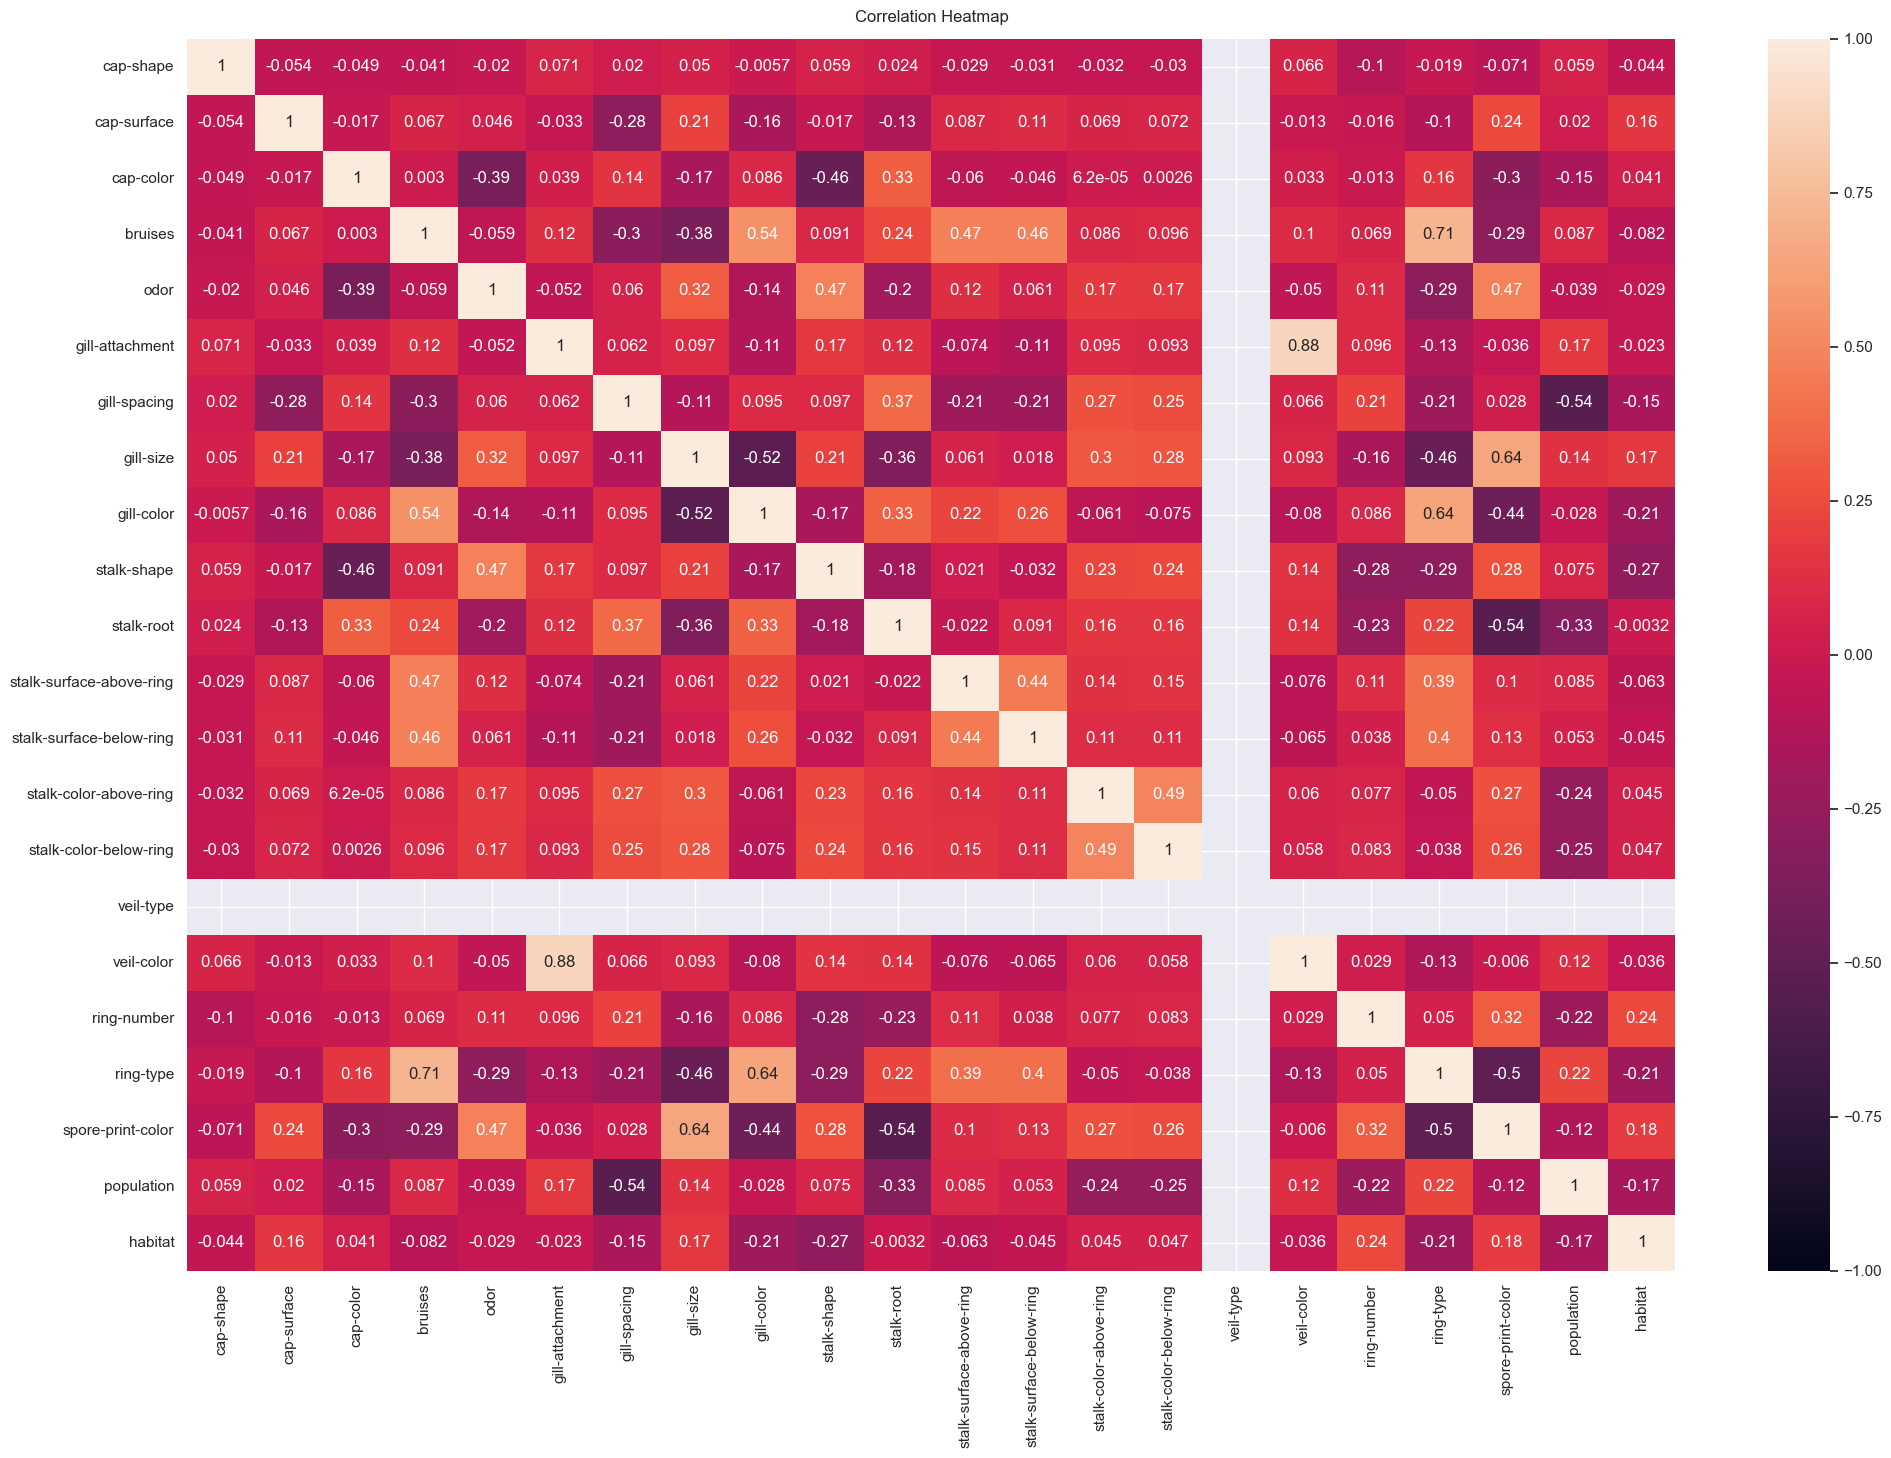

In [15]:
df = pd.read_csv("../portfolio/data/mushrooms.csv")
#Drop missing rows
df = df.dropna()

#Replace mushrooms with "class = poison" with 0
df.loc[(df["class"] == "p"),  'class'] = 0
#Replace mushrooms with "class = Edible" with 1
df.loc[(df["class"] == "e"),  'class'] = 1

# Sort and get the first 4000 poisonous mushroms and the last 4000 edible mushrooms (balances classes)
# Must be a quicker way to do this. 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html
# https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers 
columns = df.columns[0:]
for column in columns:
    df[column] = pd.factorize(df[column], sort=True)[0]

# columns_to_drop = ["gill-attachment", "veil-type","bruises"]
# for column in columns_to_drop:
#     if column in df.columns:
#         df = df.drop(column, axis=1)
df = df.drop_duplicates()
p = df.sort_values("class")[0:4000]
e = df.sort_values("class")[-4000:]

df = pd.concat([p, e])
df.columns
print(df.columns)
print(df.shape)
correlation = df.drop(columns = "class")
plt.figure(figsize=(24,16))
heatmap = sns.heatmap(correlation.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Heatmap", fontdict = {'fontsize':12}, pad=12)



In [16]:
#Pick two features
feature1 = "cap-color"
feature2 = "gill-color"
#Pick max_depth
max_depth = 8
#Train model, plot decision boundary 
x = df[[feature1,feature2]].values
y = pd.to_numeric(df["class"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)
#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)

Accuracy: 85.29166666666667


/var/folders/5h/m30z34ld513d_401ljl8fq600000gn/T/ipykernel_78080/1863830469.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


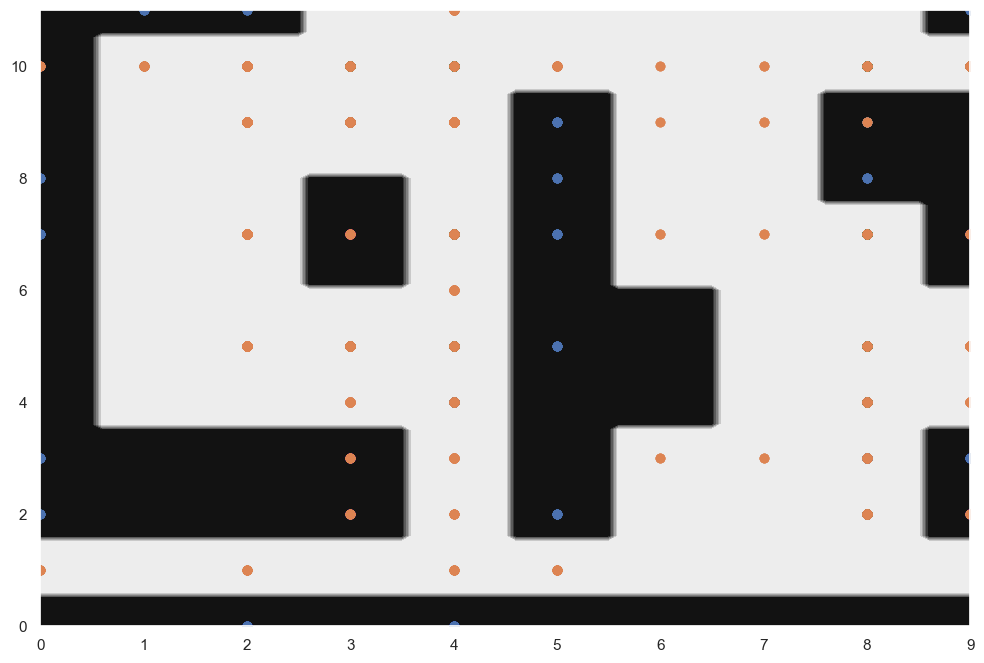

In [17]:
plt.figure(figsize=(12,8))
#Set bounds to min and max values of features 
plt.xlim([np.min(x[:,0]),np.max(x[:,0])])
plt.ylim([np.min(x[:,1]),np.max(x[:,1])])
plot_decision(x, y, model, 2)

See what the decision tree for your best feature pair looks like

1. Look through the choices the tree makes. You may have to alter the `figsize` and `fontsize` for deeper trees.


2. Look at splits the tree decided to make, can you see how it has balanced both large splits and low gini impurity scores?

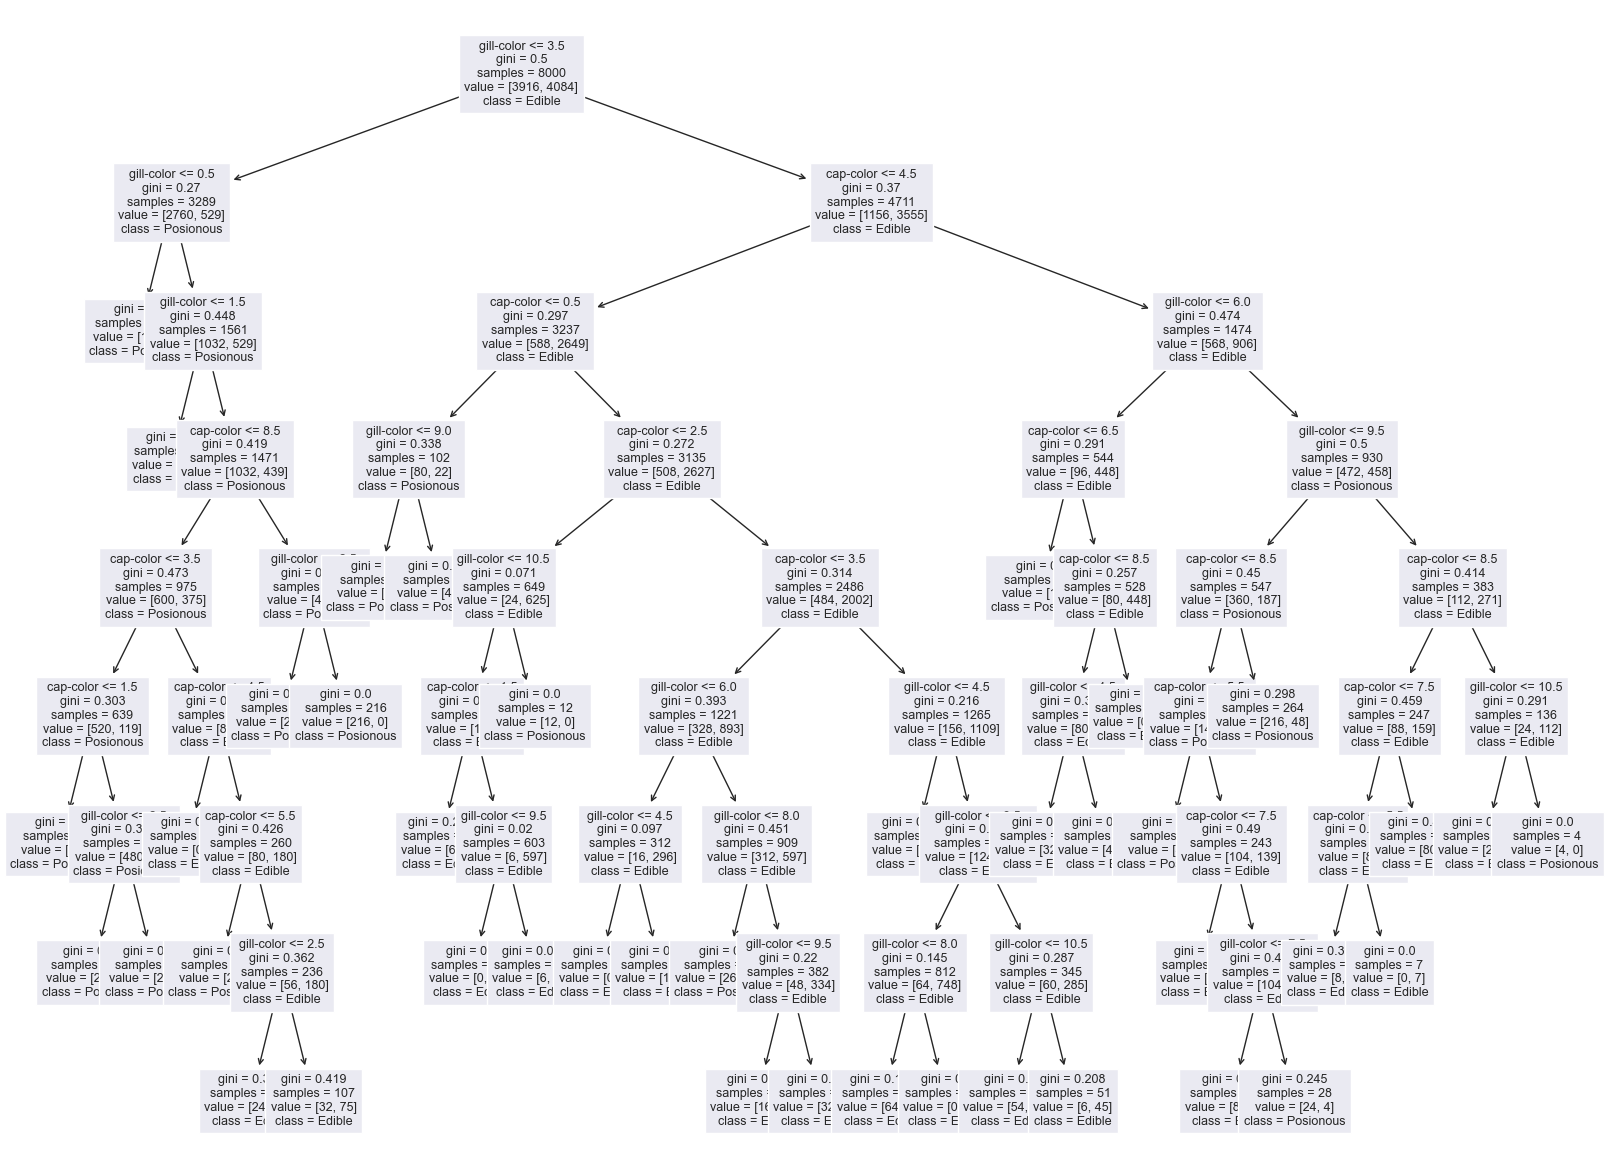

In [18]:
plt.figure(figsize=(20,15))
my_tree = plot_tree(model, feature_names=[feature1,feature2],fontsize=9,class_names = ["Posionous","Edible"])

Accuracy: 100.0
1.0
1.0


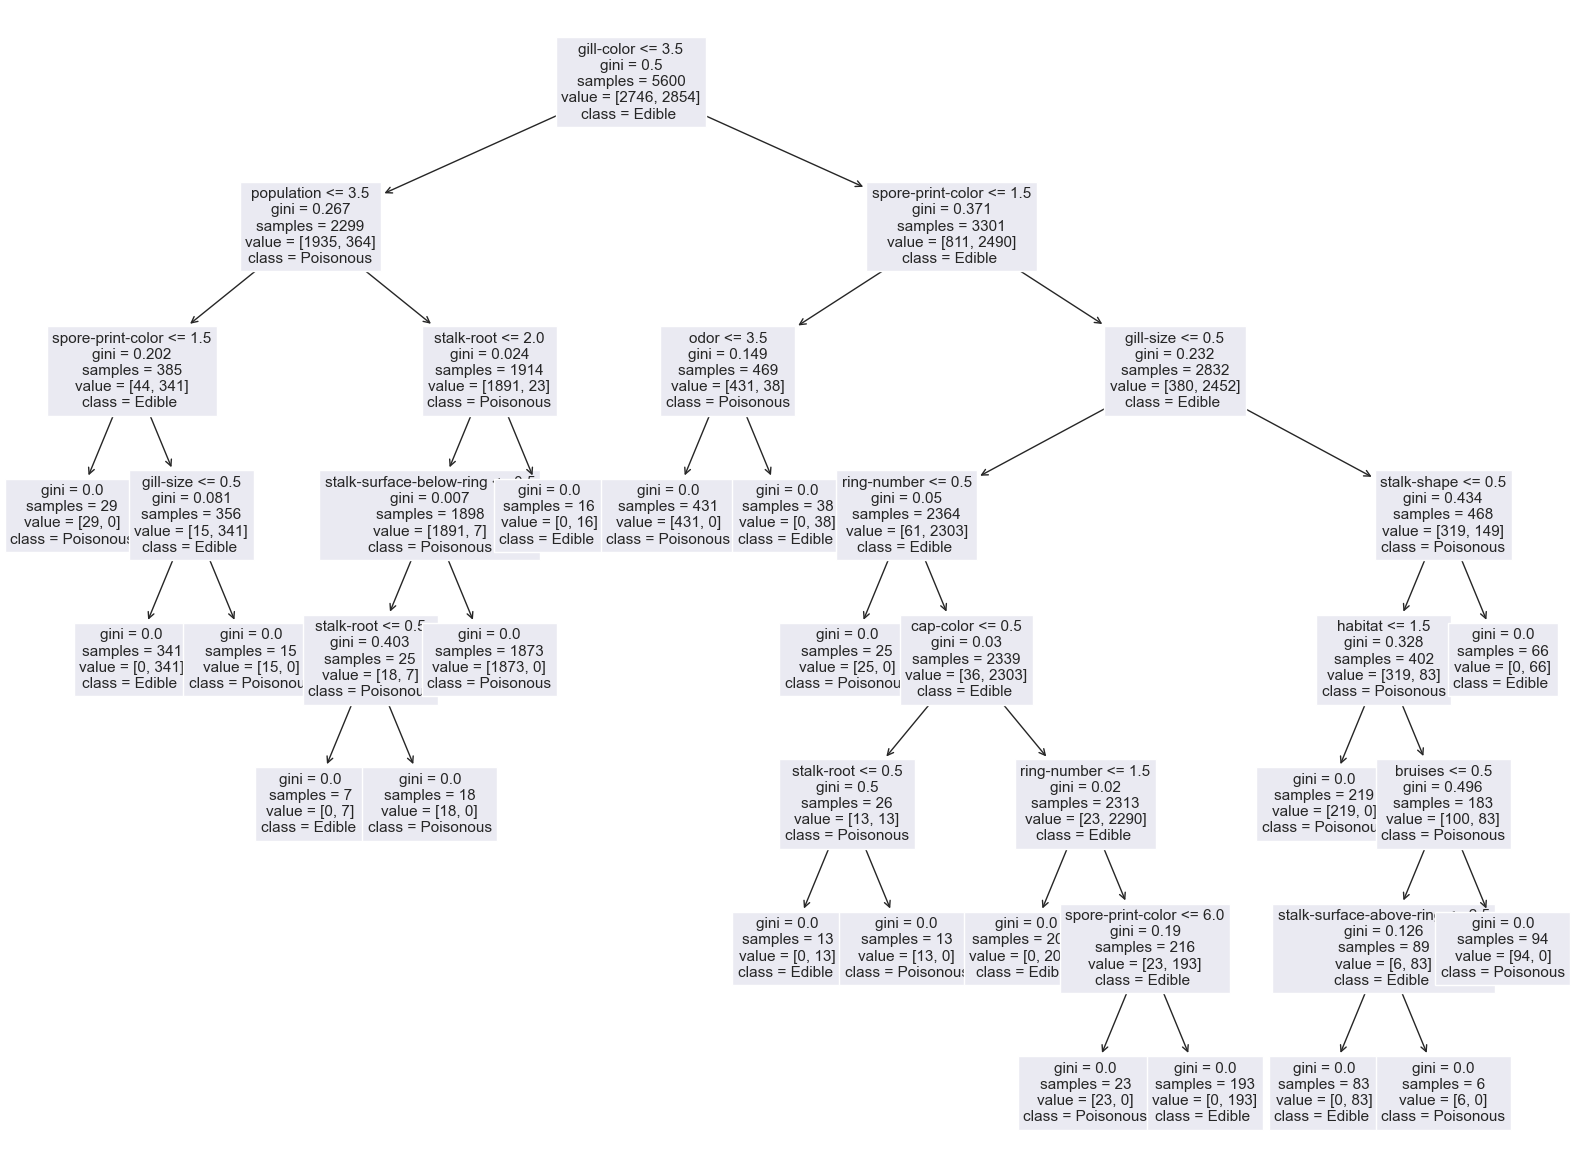

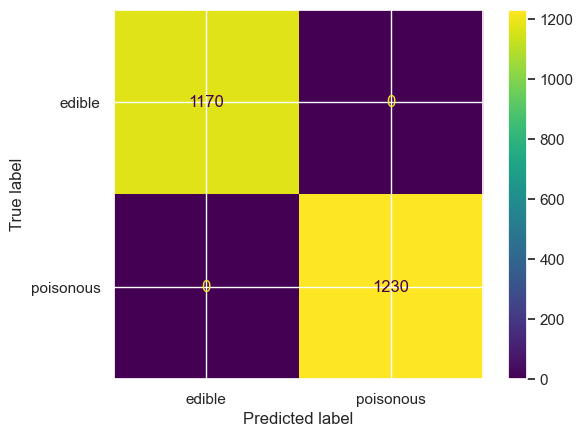

1.0
1.0


In [19]:
#Pick all features for input
x_labels = list(df.columns.values)
x_labels.remove("class")
x = df[x_labels]
max_depth = 7
#Fit model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100

print("Accuracy:", acc)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

plt.figure(figsize=(20,15))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11,class_names = ["Poisonous","Edible "]) 

#  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
con_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["edible", "poisonous"]
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=class_labels)
disp.plot()
plt.show()
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

# Only 20 combos of those two things
# do value counts on those two and only 20 different ones 

In [20]:
from collections import Counter

# Counter to see if I have good distribution across the datasets. 

# Help from Louie and ChatGTP 
def check_class_distribution(y, dataset_name):
    class_distribution = Counter(y)
    print(f"Class distribution in {dataset_name} set:")
    for label, count in class_distribution.items():
        if label == 0:
            label = 'Poisonous'
        else:
            label = 'Edible'
        print(f"Class {label}: {count} samples")

check_class_distribution(y_train, "training")
check_class_distribution(y_test, "test")




Class distribution in training set:
Class Poisonous: 2746 samples
Class Edible: 2854 samples
Class distribution in test set:
Class Poisonous: 1170 samples
Class Edible: 1230 samples


In [21]:
# ChatGTP helped here !
# I asked it to help me calculate the accuracy of individual featues in a decision tree. 
target_variable = "class"
features = df.drop(target_variable, axis=1).columns

accuracy_scores = []

for feature in features:
    x = df[[feature]].values
    y = pd.to_numeric(df[target_variable])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)

    # Make predictions on the test set and 
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test) * 100
    accuracy_scores.append((feature, accuracy))

for feature, accuracy in accuracy_scores:
    print(f"{feature}, Accuracy: {accuracy:.2f}%")



cap-shape, Accuracy: 56.29%
cap-surface, Accuracy: 58.21%
cap-color, Accuracy: 58.04%
bruises, Accuracy: 75.83%
odor, Accuracy: 98.71%
gill-attachment, Accuracy: 51.25%
gill-spacing, Accuracy: 61.08%
gill-size, Accuracy: 75.08%
gill-color, Accuracy: 80.08%
stalk-shape, Accuracy: 55.67%
stalk-root, Accuracy: 65.38%
stalk-surface-above-ring, Accuracy: 78.08%
stalk-surface-below-ring, Accuracy: 77.04%
stalk-color-above-ring, Accuracy: 71.29%
stalk-color-below-ring, Accuracy: 71.29%
veil-type, Accuracy: 51.25%
veil-color, Accuracy: 51.33%
ring-number, Accuracy: 53.58%
ring-type, Accuracy: 77.38%
spore-print-color, Accuracy: 87.38%
population, Accuracy: 71.42%
habitat, Accuracy: 69.21%


                     Feature  Importance
8                 gill-color    0.343957
19         spore-print-color    0.209344
20                population    0.174831
7                  gill-size    0.120061
21                   habitat    0.028522
3                    bruises    0.028410
9                stalk-shape    0.025509
4                       odor    0.024953
13    stalk-color-above-ring    0.017135
10                stalk-root    0.011254
2                  cap-color    0.008410
18                 ring-type    0.004645
17               ring-number    0.001587
12  stalk-surface-below-ring    0.001382
16                veil-color    0.000000
0                  cap-shape    0.000000
15                 veil-type    0.000000
14    stalk-color-below-ring    0.000000
1                cap-surface    0.000000
6               gill-spacing    0.000000
5            gill-attachment    0.000000
11  stalk-surface-above-ring    0.000000


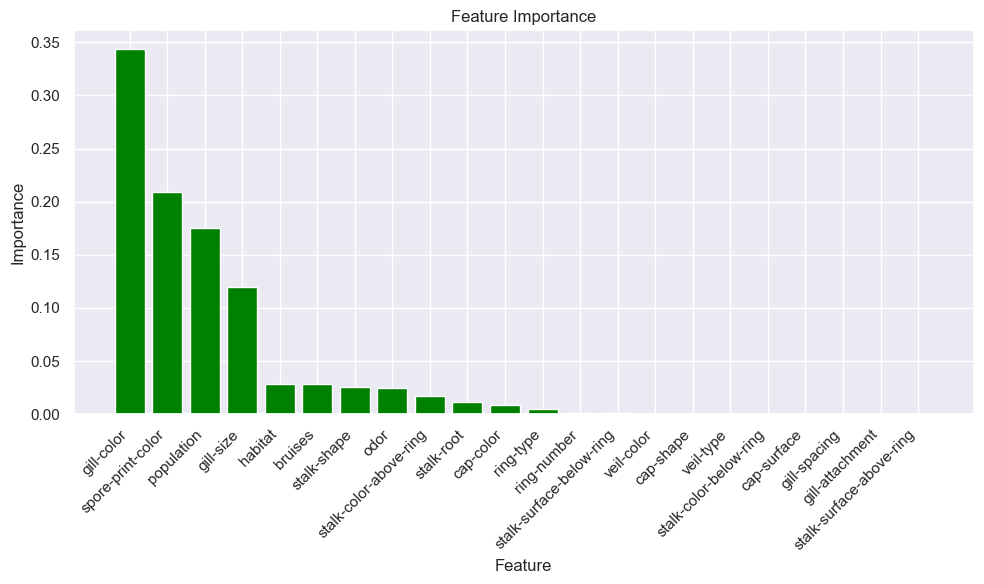

In [22]:
# ChatGTP helped here !
# I asked it to help me calculate the importance of individual featues in a decision tree. 
# The idea to calculate these came after discussing my work with class mates 

target_variable = "class"
features = df.drop(target_variable, axis=1)
labels = pd.to_numeric(df[target_variable])
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

model = DecisionTreeClassifier(max_depth=7)

model.fit(x_train, y_train)

feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plotting the feature importances on a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
